# Example 5: Clustering  
## Grouping Wines into Cultivars / Origins


### Importing Required Libraries
This cell imports all the Python libraries needed for data handling, clustering algorithms, evaluation metrics, and visualization.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score
)

### Loading the Wine Dataset
The Wine dataset from `sklearn` contains chemical analysis results of wines grown in the same region but derived from three different cultivars.


In [8]:
# Load dataset
data = load_wine()

X = data.data      # Features
y = data.target    # True cultivars (labels)

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (178, 13)
Target shape: (178,)


### Feature Standardization
Clustering algorithms are distance-based, so features are standardized to ensure that all variables contribute equally.


In [9]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Defining Clustering Algorithms
We apply three clustering techniques:
- K-Means
- Agglomerative (Hierarchical) Clustering
- DBSCAN


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=2, min_samples=2)


### Fitting Models and Generating Cluster Labels
Each clustering algorithm is fitted to the standardized data, and cluster labels are generated.


In [11]:
kmeans_labels = kmeans.fit_predict(X_scaled)
agglo_labels = agglo.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)


### Cluster Evaluation Metrics
This function evaluates clustering performance using:
- Silhouette Score
- Davies-Bouldin Index
- Calinski-Harabasz Index
- Adjusted Rand Index (comparison with true labels)


In [12]:
def evaluate_cluster(y_true, y_pred, X):
    silhouette = silhouette_score(X, y_pred)
    db_score = davies_bouldin_score(X, y_pred)
    ch_score = calinski_harabasz_score(X, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Score: {db_score:.4f}")
    print(f"Calinski-Harabasz Score: {ch_score:.4f}")
    print(f"Adjusted Rand Index: {ari:.4f}")


### Evaluating Clustering Algorithms
The clustering results from K-Means, Agglomerative Clustering, and DBSCAN are evaluated using multiple performance metrics.


In [13]:
print("KMeans Evaluation")
evaluate_cluster(y, kmeans_labels, X_scaled)

print("\nAgglomerative Clustering Evaluation")
evaluate_cluster(y, agglo_labels, X_scaled)

print("\nDBSCAN Evaluation")
evaluate_cluster(y, dbscan_labels, X_scaled)


KMeans Evaluation
Silhouette Score: 0.2849
Davies-Bouldin Score: 1.3892
Calinski-Harabasz Score: 70.9400
Adjusted Rand Index: 0.8975

Agglomerative Clustering Evaluation
Silhouette Score: 0.2774
Davies-Bouldin Score: 1.4186
Calinski-Harabasz Score: 67.6475
Adjusted Rand Index: 0.7899

DBSCAN Evaluation
Silhouette Score: -0.0881
Davies-Bouldin Score: 1.9695
Calinski-Harabasz Score: 7.9273
Adjusted Rand Index: 0.2836


### Cluster Visualization Function
This function visualizes clusters using the first two standardized features and assigns a clear color and label to each cluster.


In [14]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))

    # Unique cluster labels
    unique_labels = np.unique(labels)

    # Colormap
    cmap = plt.cm.get_cmap("viridis", len(unique_labels))

    for idx, cluster in enumerate(unique_labels):
        mask = labels == cluster

        # Handle DBSCAN noise label
        if cluster == -1:
            plt.scatter(
                X[mask, 0],
                X[mask, 1],
                c="red",
                label="Noise",
                s=50,
                alpha=0.6
            )
        else:
            plt.scatter(
                X[mask, 0],
                X[mask, 1],
                color=cmap(idx),
                label=f"Cluster {cluster}",
                s=50,
                alpha=0.6
            )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


### Visualizing Clustering Results
Below are the visualizations of the clustering results produced by:
- K-Means
- Agglomerative Clustering
- DBSCAN


C:\Users\User\AppData\Local\Temp\ipykernel_20504\2307864365.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis", len(unique_labels))


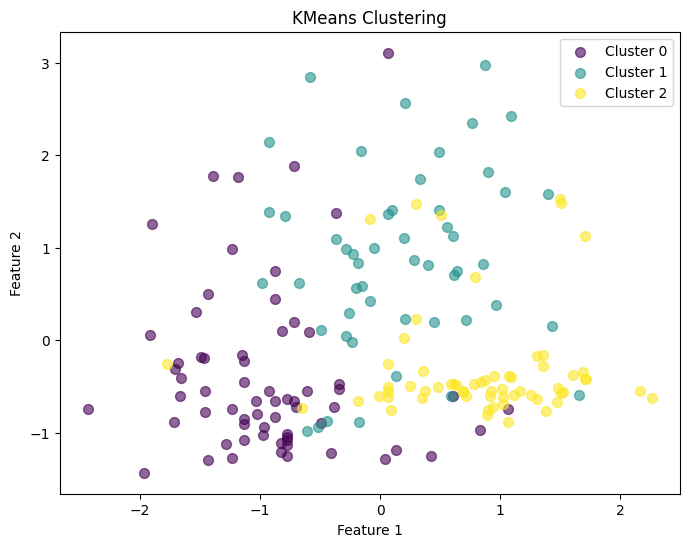

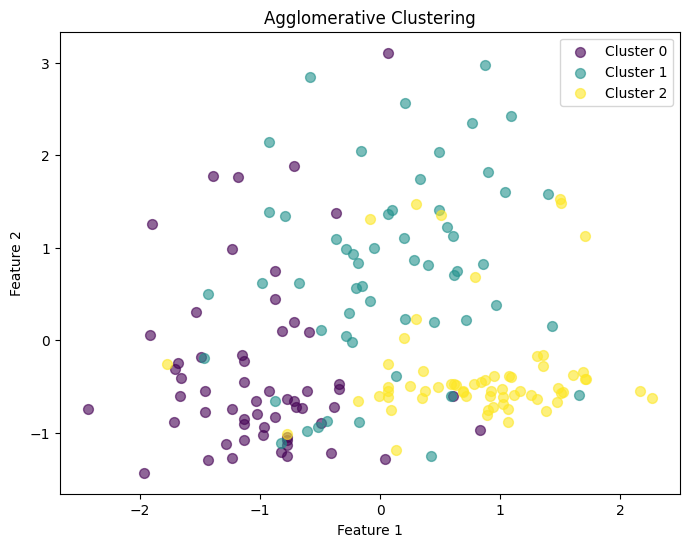

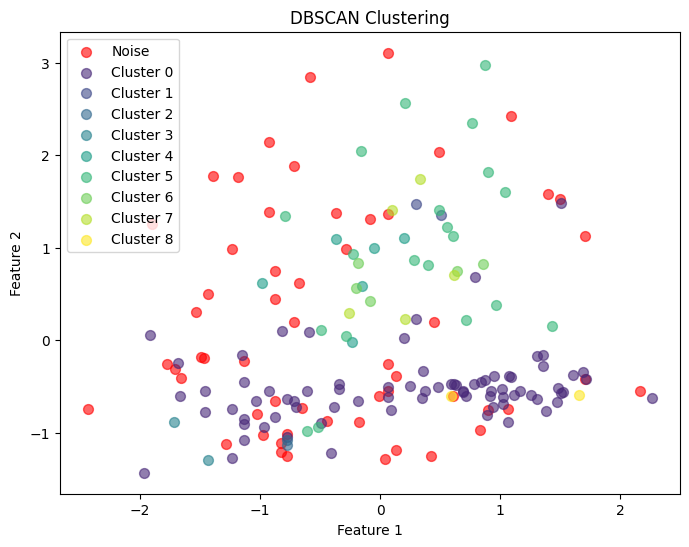

In [15]:
plot_clusters(X_scaled[:, :2], kmeans_labels, "KMeans Clustering")
plot_clusters(X_scaled[:, :2], agglo_labels, "Agglomerative Clustering")
plot_clusters(X_scaled[:, :2], dbscan_labels, "DBSCAN Clustering")


In [17]:
import os
os.makedirs("models", exist_ok=True)

joblib.dump(kmeans, "models/kmeans.pkl")
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

### Conclusion
Through the use of evaluation metrics and visual analysis, we can assess the efficacy of various clustering algorithms in categorizing wine samples by cultivar. While K-Means and Agglomerative Clustering yield distinct, well-defined clusters, DBSCAN proves valuable for its ability to isolate outliers and noise within the data.
